## Letter Recognition 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("letter-recognition.csv")

In [3]:
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [4]:
df.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [5]:
df.shape

(20000, 17)

In [6]:
df.columns

Index(['letter', 'xbox ', 'ybox ', 'width ', 'height', 'onpix ', 'xbar ',
       'ybar ', 'x2bar', 'y2bar ', 'xybar ', 'x2ybar', 'xy2bar', 'xedge ',
       'xedgey', 'yedge ', 'yedgex'],
      dtype='object')

In [7]:
# let's 'reindex' the column names
df.columns = ['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar',
       'ybar', 'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge',
       'xedgey', 'yedge', 'yedgex']
df.columns

Index(['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar',
       'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey',
       'yedge', 'yedgex'],
      dtype='object')

In [8]:
order = list(np.sort(df['letter'].unique()))
print(order)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


<Axes: xlabel='letter', ylabel='xbox'>

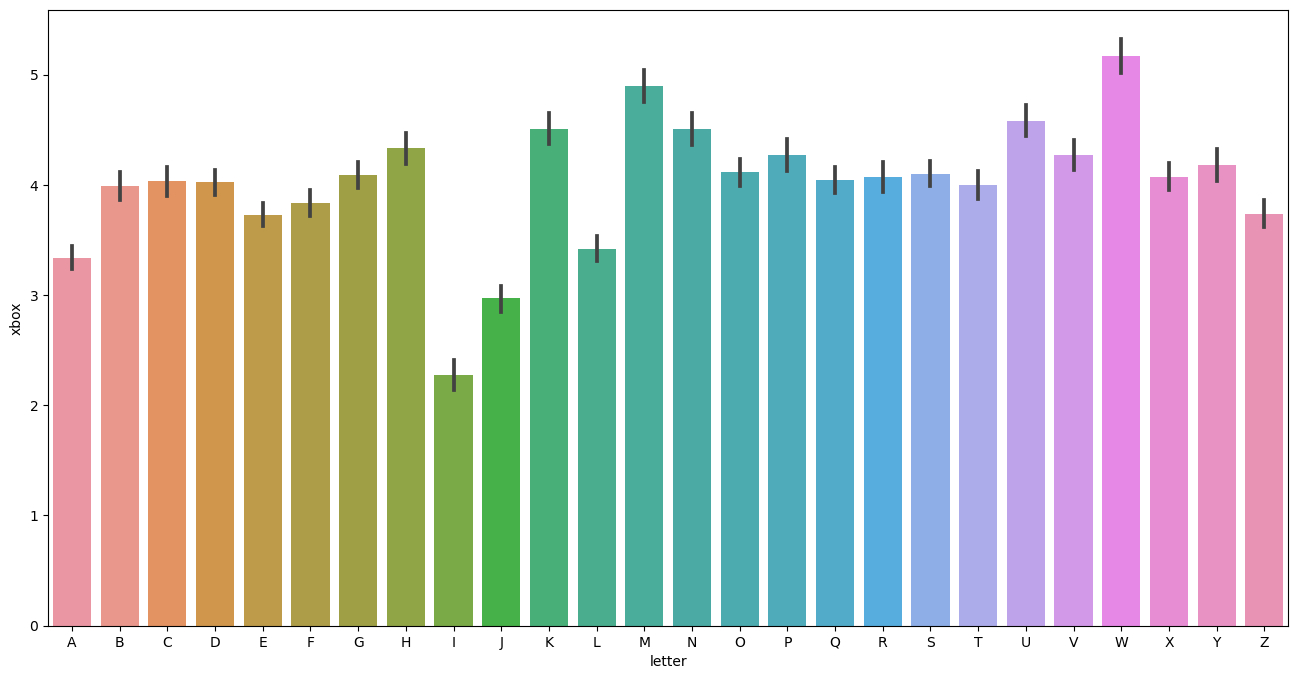

In [9]:
plt.figure(figsize=(16, 8))
sns.barplot(x='letter', y='xbox', data=df, order=order)

In [10]:
df1 = df.groupby('letter').mean()
df1.head()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
letter,,,,,,,,,,,,,,,,
A,3.337136,6.975919,5.128010,5.178707,2.991128,8.851711,3.631179,2.755387,2.043093,7.802281,2.338403,8.465146,2.771863,6.321926,2.875792,7.468948
B,3.985640,6.962141,5.088773,5.169713,4.596606,7.671018,7.062663,5.366841,5.571802,7.954308,5.506527,6.652742,3.117493,7.919060,6.612272,9.100522
C,4.031250,7.063859,4.701087,5.296196,2.775815,5.437500,7.627717,5.927989,7.177989,8.773098,7.494565,11.947011,1.991848,8.876359,4.080163,8.555707
D,4.023602,7.244720,5.170186,5.288199,4.026087,7.539130,6.806211,5.921739,6.508075,8.166460,5.111801,5.750311,3.365217,7.813665,3.971429,7.628571
E,3.727865,6.944010,4.756510,5.201823,3.679688,5.966146,7.352865,4.223958,7.585938,8.507812,6.242188,10.341146,2.127604,8.298177,6.022135,8.506510


<Axes: ylabel='letter'>

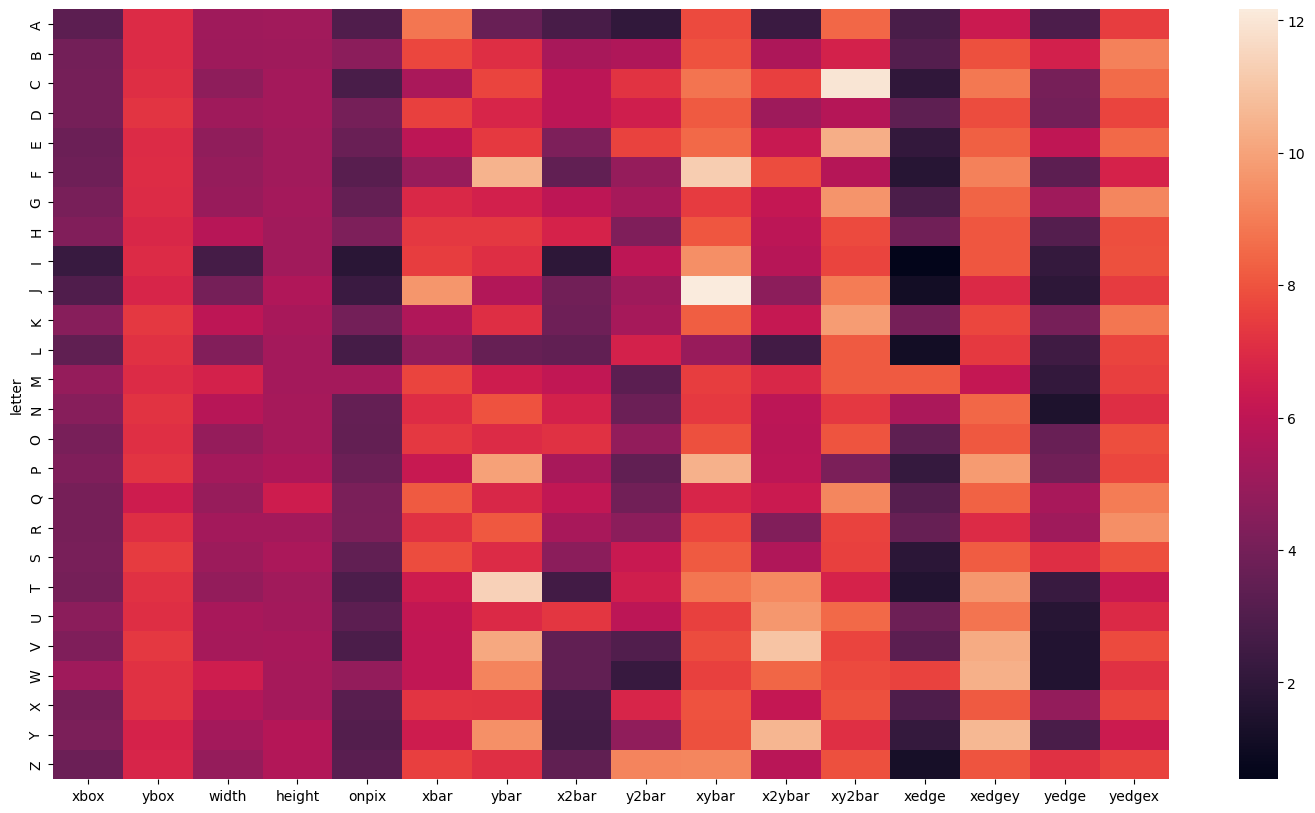

In [11]:
plt.figure(figsize=(18, 10))
sns.heatmap(df1)

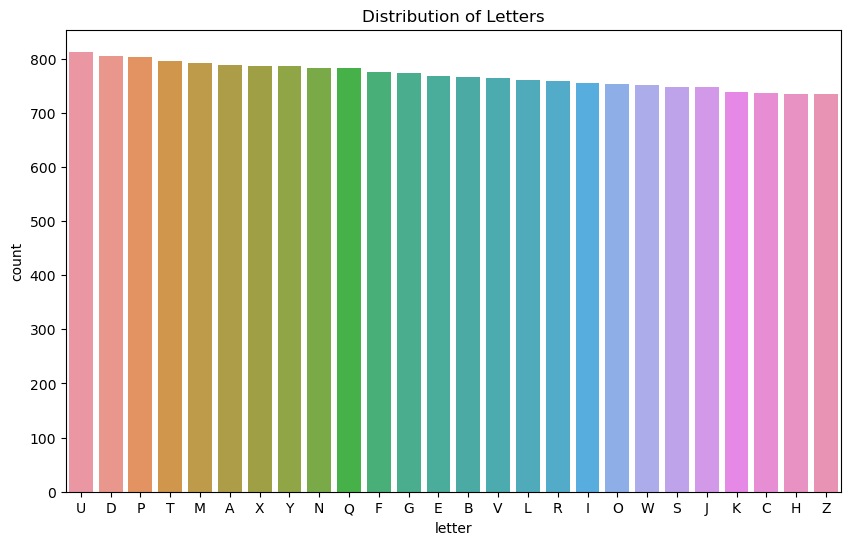

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='letter', order=df['letter'].value_counts().index)
plt.title("Distribution of Letters")
plt.show()

**Data Preparation**

In [13]:
# average feature values
round(df.drop('letter', axis=1).mean(), 2)

xbox      4.02
ybox      7.04
width     5.12
height    5.37
onpix     3.51
xbar      6.90
ybar      7.50
x2bar     4.63
y2bar     5.18
xybar     8.28
x2ybar    6.45
xy2bar    7.93
xedge     3.05
xedgey    8.34
yedge     3.69
yedgex    7.80
dtype: float64

In [14]:
# splitting into X and y
X = df.drop("letter", axis = 1)
y = df['letter']

In [15]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Spliting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

**Linear SVM**

In [16]:
# Create and train the Linear SVM model
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train, y_train)

# predict
y_pred = svm_model.predict(X_test)

In [17]:
# Calculate accuracy and display results
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.86


In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.87      0.94      0.90       149
           B       0.81      0.89      0.85       153
           C       0.89      0.85      0.87       137
           D       0.76      0.92      0.83       156
           E       0.83      0.91      0.87       141
           F       0.80      0.90      0.85       140
           G       0.75      0.81      0.78       160
           H       0.65      0.58      0.61       144
           I       0.90      0.87      0.89       146
           J       0.86      0.87      0.87       149
           K       0.75      0.78      0.77       130
           L       0.95      0.86      0.91       155
           M       0.93      0.95      0.94       168
           N       0.96      0.90      0.93       151
           O       0.90      0.77      0.83       145
           P       0.96      0.84      0.90       173
           Q       0.84      0.80      0.82       166
           R       0.75    

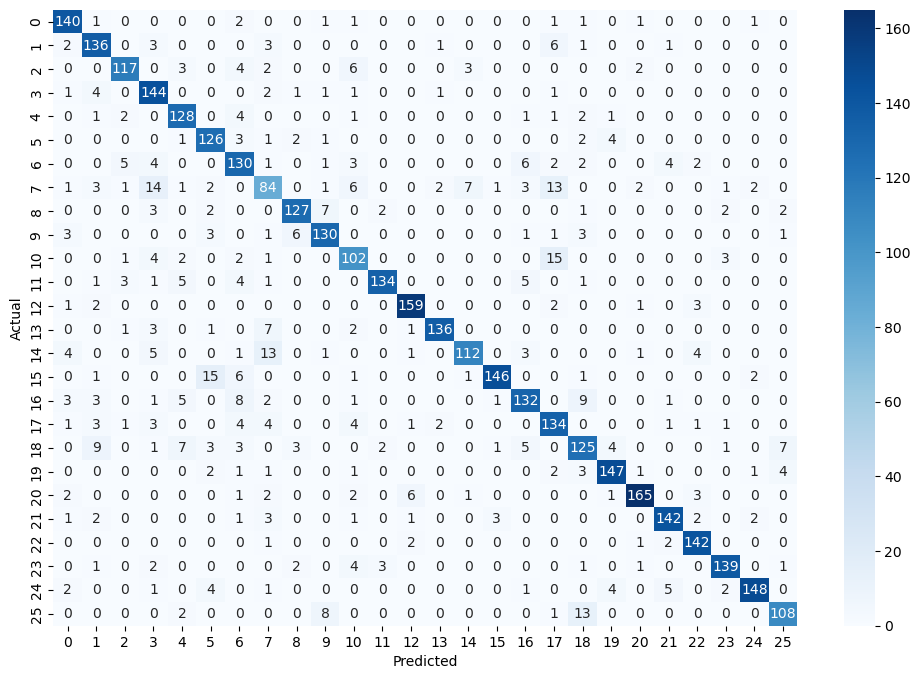

In [19]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Non-Linear SVM**

In [20]:
# Train a non-linear SVM model (e.g., using a radial basis function kernel)
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=101)
svm.fit(X_train, y_train)

SVC(random_state=101)

In [21]:
# Make predictions on the test set
y_pred = svm.predict(X_test)
     

In [22]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.95

Classification Report:
              precision    recall  f1-score   support

           A       0.98      0.99      0.99       149
           B       0.87      0.96      0.91       153
           C       0.98      0.92      0.95       137
           D       0.88      0.98      0.93       156
           E       0.91      0.96      0.93       141
           F       0.90      0.96      0.93       140
           G       0.92      0.96      0.94       160
           H       0.97      0.82      0.89       144
           I       0.98      0.93      0.95       146
           J       0.94      0.96      0.95       149
           K       0.91      0.90      0.91       130
           L       0.99      0.93      0.96       155
           M       0.98      0.99      0.99       168
           N       0.98      0.93      0.95       151
           O       0.92      0.94      0.93       145
           P       0.99      0.89      0.94       173
           Q       0.99      0.98      0.9

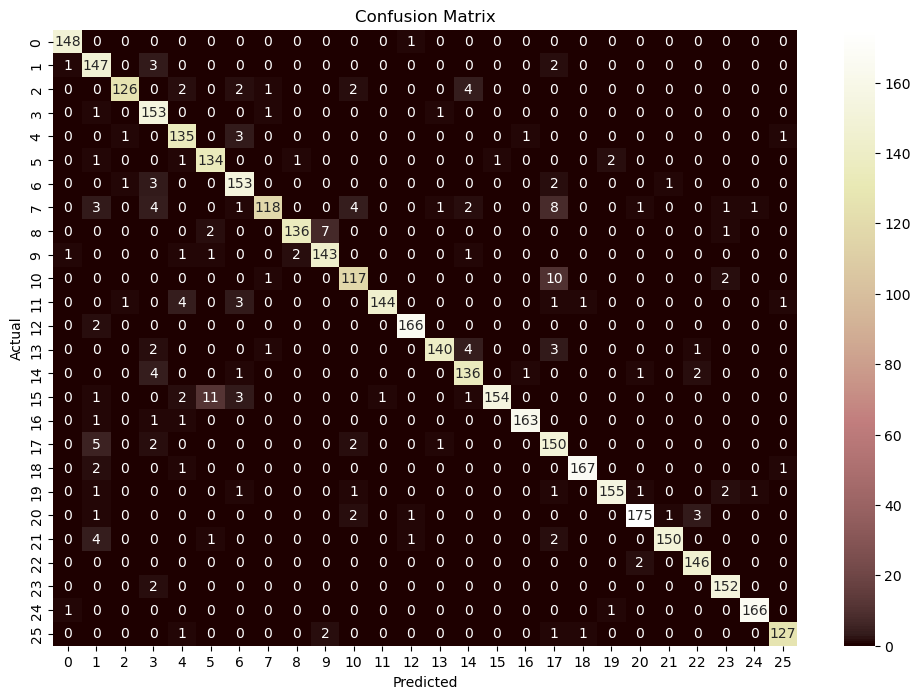

In [23]:

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='pink')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Social Network Ads Prediction using SVM

In [24]:
df = pd.read_csv('Social_Network_Ads.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [25]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [26]:
# Assuming your DataFrame is named 'df'
df.drop(['User ID', 'Gender'], axis=1, inplace=True)

In [27]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [28]:
X = df.drop('Purchased', axis=1)
Y = df['Purchased']

In [29]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [30]:
from sklearn.svm import SVC

In [31]:
svm_clf = SVC(kernel='rbf', C=1.0)
svm_clf.fit(x_train, y_train)

SVC()

In [32]:
y_pred = svm_clf.predict(x_test)

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [34]:
score = accuracy_score(y_test, y_pred)
print(score)

0.7375


In [35]:
mat = confusion_matrix(y_test, y_pred)
print(mat)

[[49  3]
 [18 10]]


In [36]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.73      0.94      0.82        52
           1       0.77      0.36      0.49        28

    accuracy                           0.74        80
   macro avg       0.75      0.65      0.66        80
weighted avg       0.74      0.74      0.71        80



In [37]:
from sklearn.inspection import DecisionBoundaryDisplay

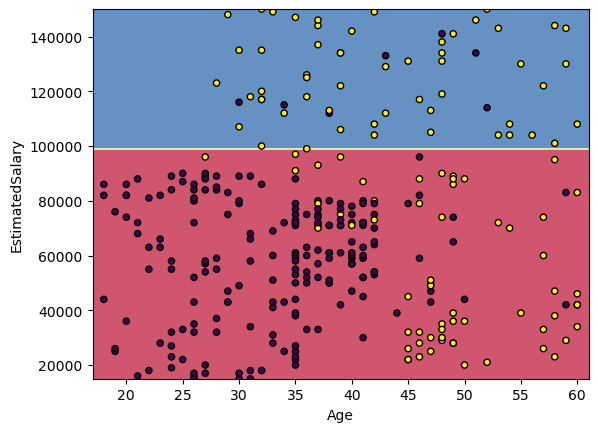

In [38]:
# Plot Decision Boundary
DecisionBoundaryDisplay.from_estimator(
        svm_clf,
        x_train,
        response_method="predict",
        cmap=plt.cm.Spectral,
        alpha=0.8,
        xlabel='Age',
        ylabel='EstimatedSalary',
    )
 
# Scatter plot
plt.scatter(x_train['Age'], x_train['EstimatedSalary'],
            c=y_train,
            s=20, edgecolors="k")
plt.show()

## IRIS Flower Prediction using Non-Linear SVM

In [39]:
df=pd.read_csv("IRIS.csv")

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [41]:
df.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [42]:
df['species'] = df['species'].replace({'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3})

In [43]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [44]:
# Select X and y without feature_names

X = df[['sepal_length','petal_width']].values  # Select the first two features for visualization purposes
y = df.species

In [45]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [46]:
from sklearn.svm import SVC

In [47]:
svm_clf = SVC(kernel='poly',degree=5, random_state=42)
svm_clf.fit(x_train, y_train)

SVC(degree=5, kernel='poly', random_state=42)

In [48]:
y_pred = svm_clf.predict(x_test)

In [49]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [50]:
score = accuracy_score(y_test, y_pred)
print(score)

1.0


In [51]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [52]:
mat = confusion_matrix(y_test, y_pred)
print(mat)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [53]:
# Define Grid for Visualization

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

In [54]:
# Make Predictions on Mesh Grid

Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

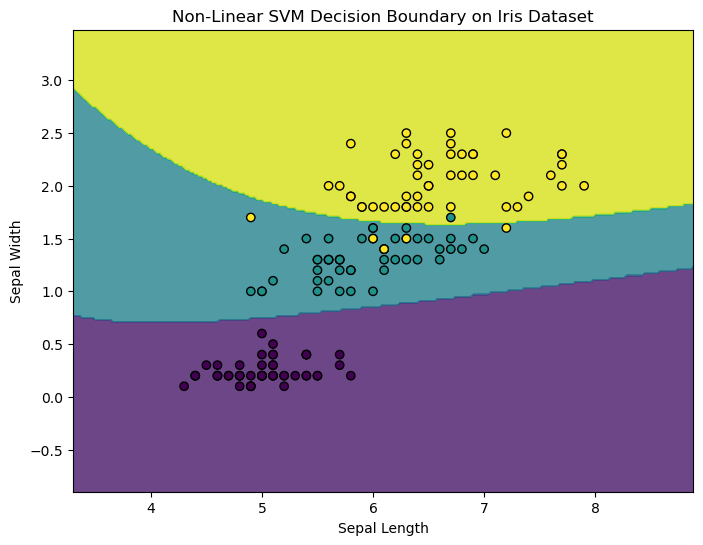

In [55]:
# Plot Decision Boundary and Data Points

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Non-Linear SVM Decision Boundary on Iris Dataset')
plt.show()